In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from sqlalchemy import create_engine

In [2]:
# Establishing SQL connection
rds_connection_string = "postgres:Tenors2015@localhost:5432/education_taxes_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

# Beginning Data Analysis

In [78]:
# Assigning variables for analysis and renaming columns, as needed
per_capita = pd.read_sql_query('select * from census_per_capita_income', con=engine)

k12_schools = pd.read_sql_query('select * from k12_schools_zip_count', con=engine)
k12_schools = k12_schools.rename(columns = {'Count':'k12 Count'})

colleges = pd.read_sql_query('select * from college_count', con=engine)
colleges = colleges.rename(columns = {'Count':'College Count'})

elct_tax = pd.read_sql_query('select * from electronically_filed', con=engine)

dir_dep_tax = pd.read_sql_query('select * from direct_deposit', con=engine)

# Schools and Per Capita Income

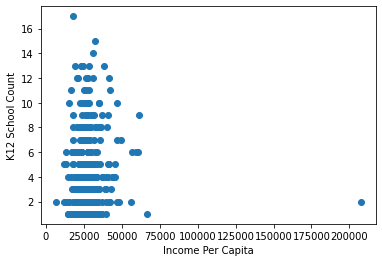

In [46]:
# Join per capita table and k12 table for correlation analysis.
# Intentionally used INNER JOIN to ensure no NaN values are present in this table
k12_per_capita = pd.merge(per_capita, k12_schools, on=['ZIP'])
plt.scatter(k12_per_capita.iloc[:,1],k12_per_capita.iloc[:,2])
plt.xlabel('Income Per Capita')
plt.ylabel('K12 School Count')
plt.show()

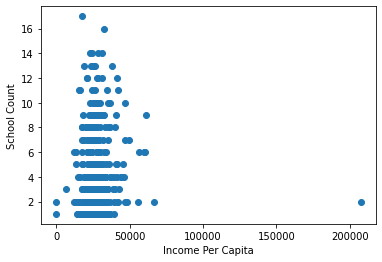

In [47]:
# Join previous table and college table for further correlation analysis. Summed total school count into new column.
# Used LEFT JOIN and filled all NaN values with 0 to preserve the prevoius table's values. 
schools_per_capita = pd.merge(k12_per_capita, colleges, how='left', on=['ZIP'])
schools_per_capita = schools_per_capita.fillna(0)
schools_per_capita['Total Schools'] = schools_per_capita['k12 Count'] + schools_per_capita['College Count']
schools_per_capita = schools_per_capita.drop(['k12 Count', 'College Count'], axis=1)
plt.scatter(schools_per_capita.iloc[:,1],schools_per_capita.iloc[:,2])
plt.xlabel('Income Per Capita')
plt.ylabel('School Count')
plt.show()

The r-squared is: 0.0017959431492107958


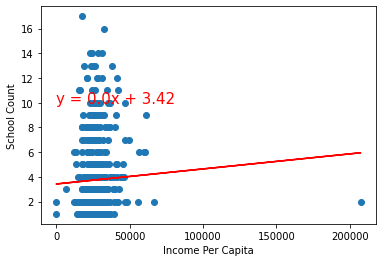

In [48]:
# Performed regression analysis on previous plot.
x_values = schools_per_capita.iloc[:,1]
y_values = schools_per_capita.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Income Per Capita')
plt.ylabel('School Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Electronic Filing and Per Capita Income

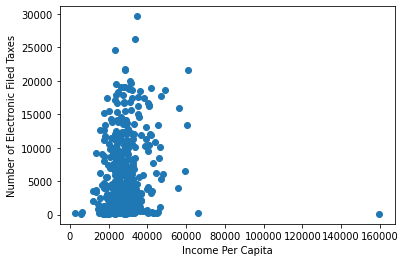

In [50]:
# Joined per capita and electronic filing tables. Used INNER JOIN.
elct_per_capita = pd.merge(per_capita, elct_tax, on=['ZIP'])
plt.scatter(elct_per_capita.iloc[:,1],elct_per_capita.iloc[:,2])
plt.xlabel('Income Per Capita')
plt.ylabel('Number of Electronic Filed Taxes')
plt.show()

The r-squared is: 0.022943831232153794


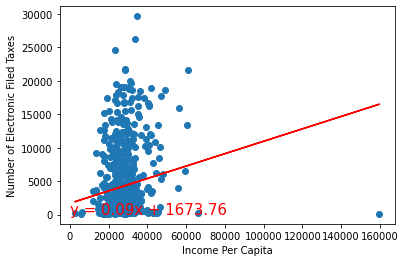

In [51]:
# Performed regression analysis on previous plot.
x_values = elct_per_capita.iloc[:,1]
y_values = elct_per_capita.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Income Per Capita')
plt.ylabel('Number of Electronic Filed Taxes')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Direct Deposit and Per Capita Income

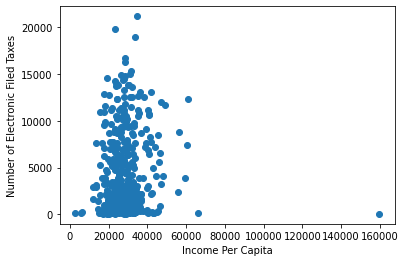

In [53]:
# Joined per capita and direct deposit tables. Used INNER JOIN. 
dep_per_capita = pd.merge(per_capita, dir_dep_tax, on=['ZIP'])
plt.scatter(dep_per_capita.iloc[:,1],dep_per_capita.iloc[:,2])
plt.xlabel('Income Per Capita')
plt.ylabel('Taxes with Direct Deposit Returns')
plt.show()

The r-squared is: 0.011079031109216497


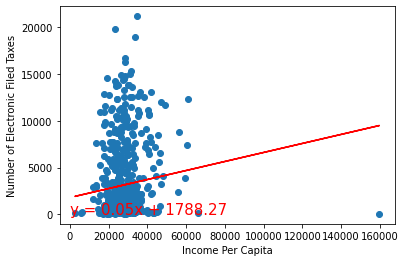

In [54]:
# Performed regression analysis on previous plot.
x_values = dep_per_capita.iloc[:,1]
y_values = dep_per_capita.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Income Per Capita')
plt.ylabel('Taxes with Direct Deposit Returns')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Electronic Filing and Direct Deposit

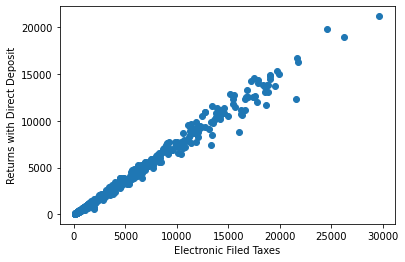

In [56]:
# Joined electronic and direct deposit tables. Used INNER JOIN. 
dep_elct_tax = pd.merge(elct_tax, dir_dep_tax, on=['ZIP'])
plt.scatter(dep_elct_tax.iloc[:,1],dep_elct_tax.iloc[:,2])
plt.xlabel('Electronic Filed Taxes')
plt.ylabel('Taxes with Direct Deposit Returns')
plt.show()

The r-squared is: 0.9890806619724084


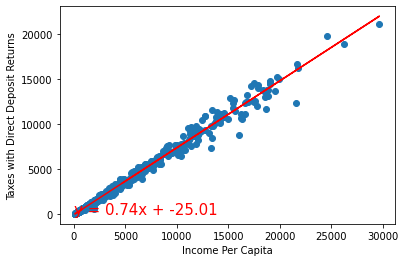

In [57]:
# Performed regression analysis on previous plot.
x_values = dep_elct_tax.iloc[:,1]
y_values = dep_elct_tax.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Income Per Capita')
plt.ylabel('Taxes with Direct Deposit Returns')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Quickly checked to see which ZIP codes have the highest per capita income and school counts. 

In [71]:
# Identifying the ZIP with the highest per capita income
top_per_capita = per_capita.sort_values('Per_Capita_Income', ascending=False).reset_index(drop=True)
top_per_capita.head()

,ZIP,Per_Capita_Income
0,47552,207327.0
1,46290,159758.0
2,47437,70870.0
3,46301,69753.0
4,47708,66383.0


In [73]:
# Identifying the ZIP with the highest number of schools
schools_per_capita = schools_per_capita.sort_values('Total Schools', ascending=False).reset_index(drop=True)
schools_per_capita.head()

,ZIP,Per_Capita_Income,Total Schools
0,46224,17860.0,17.0
1,46383,32275.0,16.0
2,46901,24598.0,14.0
3,46227,23141.0,14.0
4,47130,28646.0,14.0
